
<h1 align=center><font size = 7>Linear Regression|Insurance dataset</font></h1>


### <h1><center>Prerequisite of Overviewing  Dataset</center>

</h1><a id='top'></a><div class="list-group" id="list-tab" role="tablist">

# Content:

 **Columns**
 
**• age: age of primary beneficiary**

**• sex: insurance contractor gender, female, male**

**• bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9**

**• children: Number of children covered by health insurance / Number of dependents**

**• smoker: Smoking**

**• region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.**

**• charges: Individual medical costs billed by health insurance.**

# <h1 ><center>Insurance dataset: Linear Regression</center></h1> 
   
   <a id='top'></a>




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Some other libraries are imported in the cells ahead.

In [2]:
filename="insurance.csv"
data= pd.read_csv(filename)

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

*based on this command we can observe that we dont have any missing values.

# <h1><center>Simple EDA</center></h1> 
   
   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">


In [8]:
# brief summary for the dataset 
data.describe().T.head(4)

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


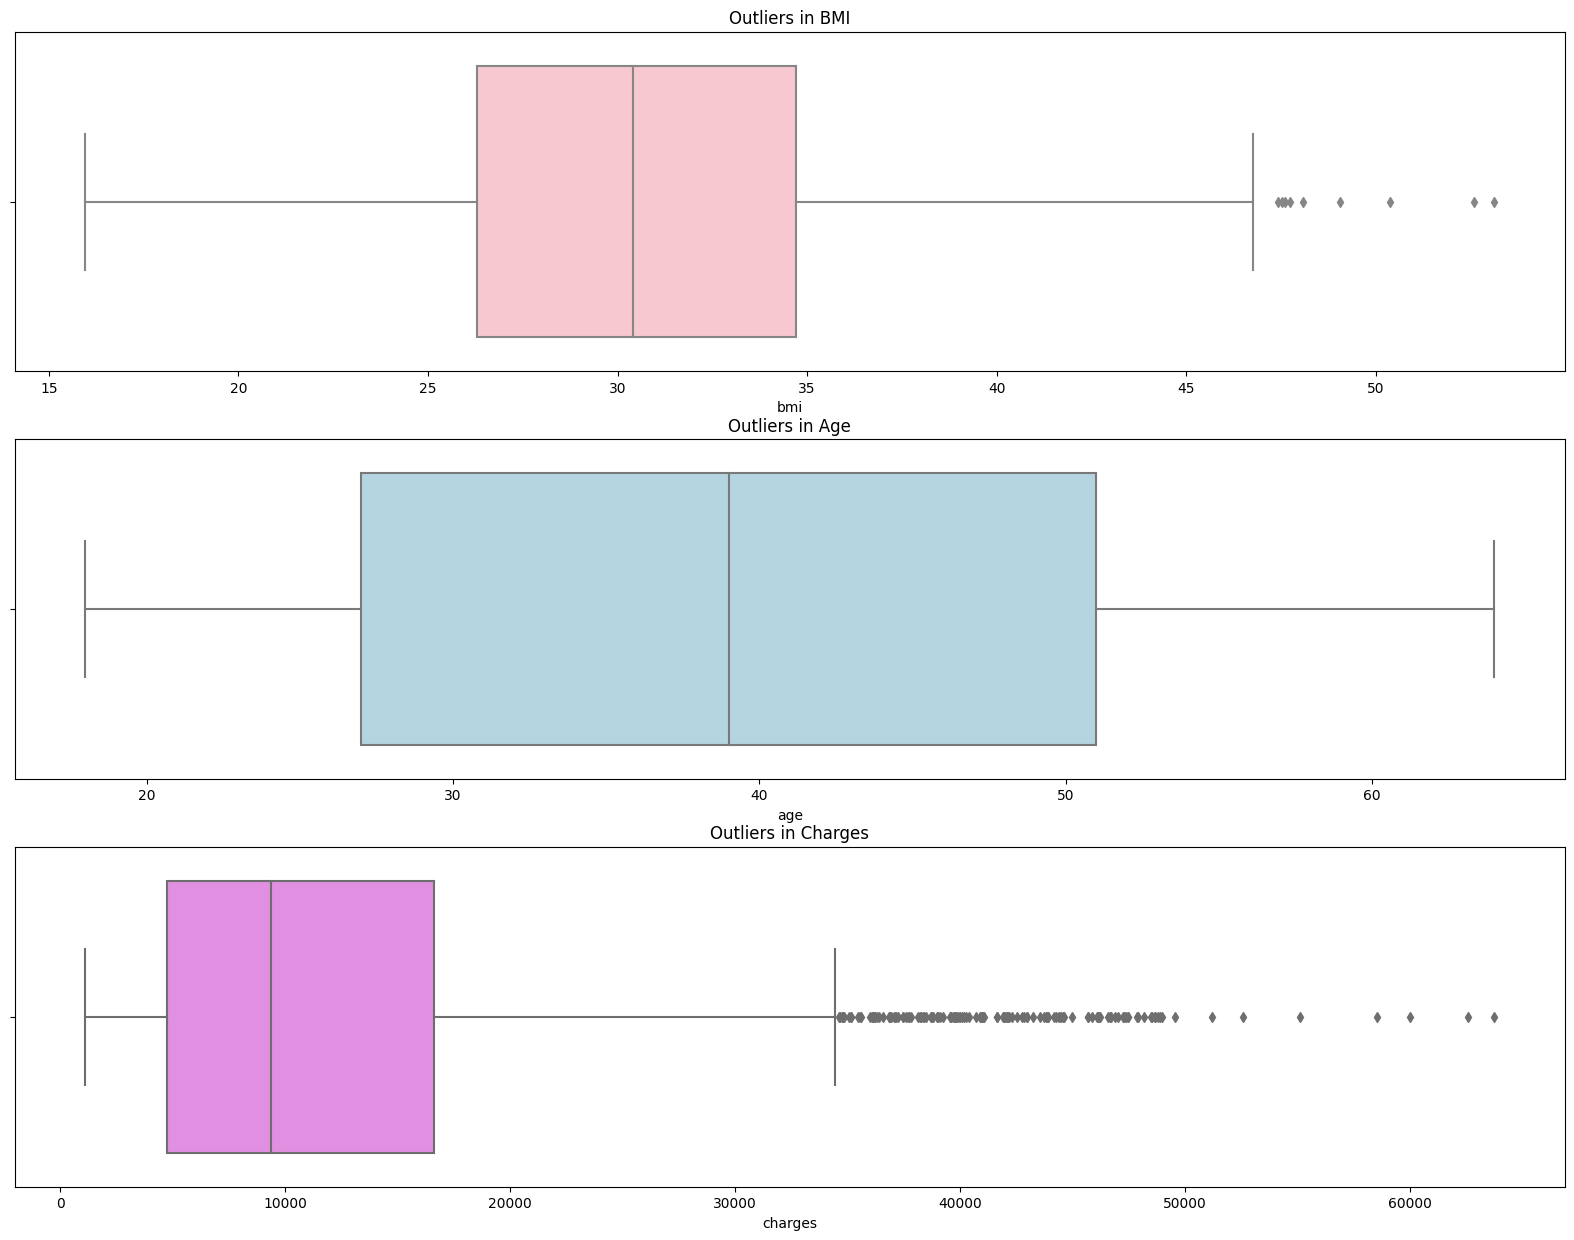

In [9]:
#Checking for the Outliers 

plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1)
sns.boxplot(x = data.bmi, color='pink').set_title('Outliers in BMI')
plt.subplot(3, 1, 2)
sns.boxplot(x = data.age, color='lightblue').set_title('Outliers in Age')
plt.subplot(3, 1, 3)
sns.boxplot(x = data.charges, color='violet').set_title('Outliers in Charges')
plt.show()

**BMI has a few Outliers.**

**Charges Boxplot shows a lot of Outliers.**

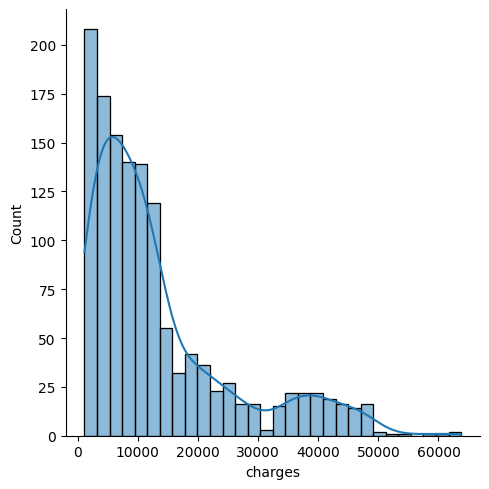

In [10]:
sns.displot(data, x='charges', kde=True)

**This plot don't have Normal Distribution , we could make it Normal But is not Necessary in this Level.**

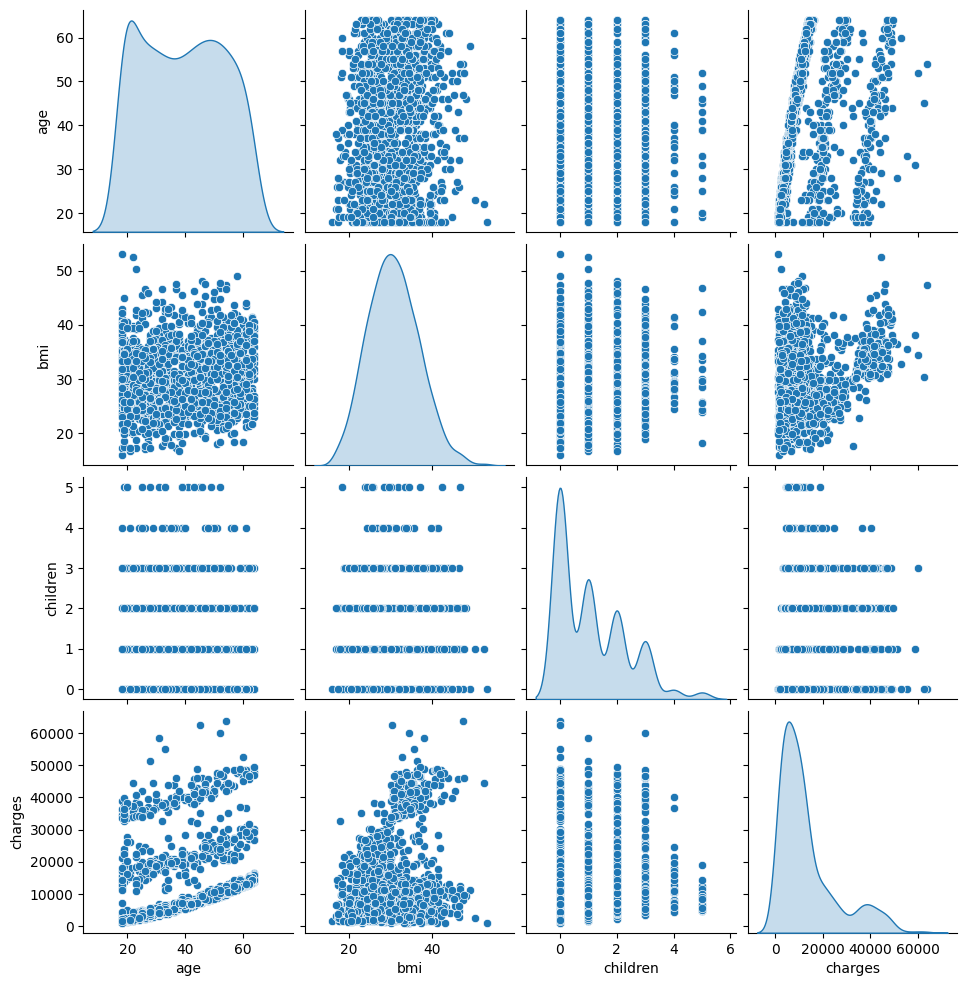

In [11]:
sns.pairplot(data,diag_kind='kde')

***The pattern between 'age' and 'charges',shows that older people charged more than the younger.**

***In compare smokers and non-smokers, smokers claimed more money than non-smokers.**

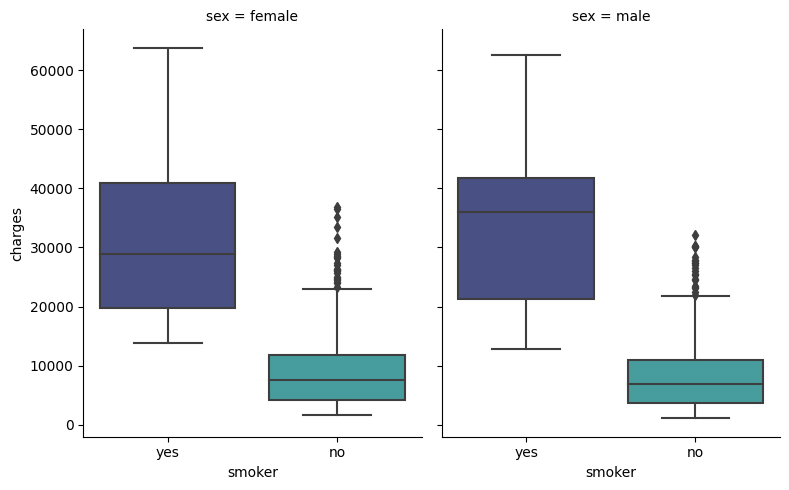

In [12]:
plot = sns.catplot(x='smoker', y='charges', col='sex', data=data, kind='box', height=5, aspect=0.8, palette='mako')

***we can observe that smokers have higher charges.**

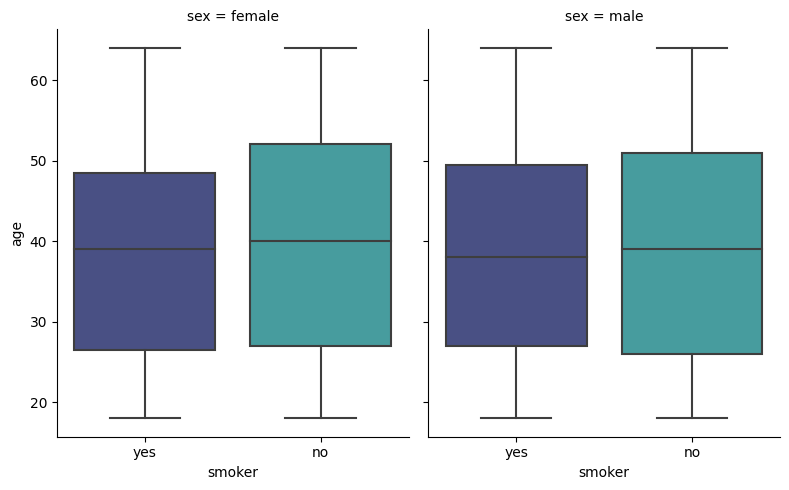

In [13]:
plot = sns.catplot(x='smoker', y='age', col='sex', data=data, kind='box', height=5, aspect=0.8, palette='mako')

***it seems that there are more male smokers than female and may for this conception the charges for male smokers are higher.**

## <h1><center>Data preparation --> Dealing with Categorical Data</center></h1> 
   
   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">


### One Hot (Encode the Categorical features)

In [14]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
#The Linear Regression can be performed only on Numbers.
#converting Categories to Numbers:

colums = ['sex', 'smoker', 'region']
data = pd.get_dummies(data, colums, drop_first= True)


In [16]:
data.columns 

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [17]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## <h1><center> 📈 Training a Linear Regression Model</center></h1> 
   
   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">


## Determine the Features & Target Variable

In [18]:
X = data.drop('charges',axis=1)
y = data['charges']

In [19]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [20]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

## Split the Dataset to Train & Test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=1)

#consider 20% for test
#consider 80% for train

## Train the Model using the X_train and y_train

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model= LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

## <h1>Coeficient Matrix (Find the coefficients)</h1> 
   
   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">


In [26]:
pd.DataFrame(model.coef_, X.columns, columns=['Coeficient'])

,Coeficient
age,257.490247
bmi,321.621893
children,408.061020
sex_male,-242.153066
smoker_yes,23786.486045
region_northwest,-396.096564
region_southeast,-1038.375880
region_southwest,-903.033008


## <h1>Predicting Test Data</h1>
<a id='top'></a><div class="list-group" id="list-tab" role="tablist">

In [27]:
y_pred=model.predict(X_test)

In [28]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred }).head(5)

,Y_Test,Y_Pred
559,1646.4297,4383.680900
1087,11353.2276,12885.038922
1020,8798.5930,12589.216532
460,10381.4787,13286.229192
802,2103.0800,544.728328


## <h1>Evalutaing the Model (Find the error (MSE) of the model)

</h1><a id='top'></a><div class="list-group" id="list-tab" role="tablist">

In [29]:
#Evaluating by score
model.score(X_test, y_test).round(3)

0.762

76.2%.. A slight improvement!
Maybe we have to use Polynomial Regression later!

In [30]:
model.score(X_train, y_train).round(3)

0.748

In [31]:
#Using Metrics To Evaluate

from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,4.051859e+03
MSE,3.547935e+07
RMSE,5.956455e+03


In [32]:
#Compare the metrics to the mean of target variable
data['charges'].mean()

13270.422265141257

## <h1>Residuals (Difference between y_test and y_pred)</h1>
<a id='top'></a><div class="list-group" id="list-tab" role="tablist">

In [33]:
test_residuals=y_test-y_pred

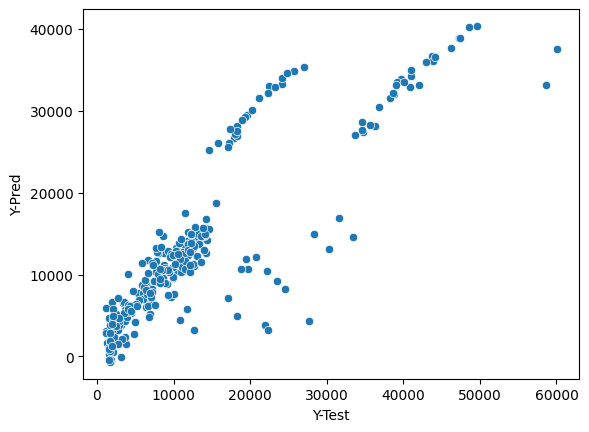

In [34]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')
plt.show()

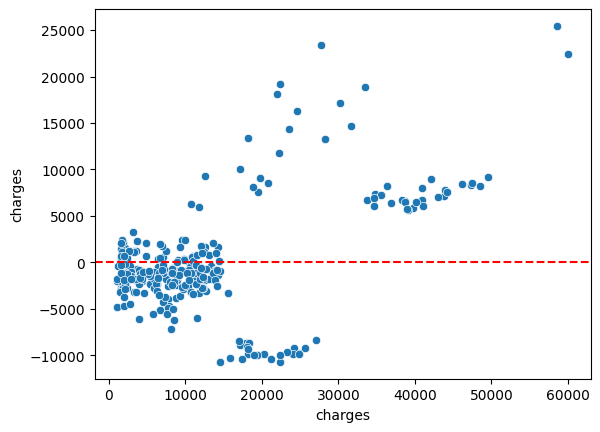

In [35]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')
plt.show()

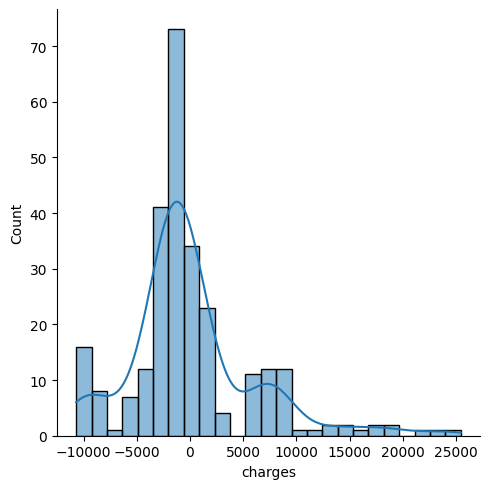

In [36]:
sns.displot(test_residuals, bins=25, kde=True)

# <h1 >Saving and Loading the Model (Save the trained model and load that again)</h1> 
   
   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">


In [37]:
from joblib import dump, load

In [38]:
#Saving  model

final_model=LinearRegression()
final_model.fit(X,y)
dump(final_model, 'insuance.predict')

['insuance.predict']

In [39]:
# Loading Model:
load_model=load('insuance.predict')

## Predict a sample  (ex: [19, 27.9, 0,0,1,0,0,1])

In [40]:
Campaign=[[19, 27.9, 0,0,1,0,0,1]]

In [41]:
load_model.predict(Campaign)

C:\Users\Chandrahas\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25293.7130284])

In [42]:
y_train[0]

16884.924

**Real Charges is : 16884.92400!**

**This prediction is far from reality.**

***That could have several reasons, for example we didn't remove outliers.**

***We did not normalize the label distribution and etc.**

# <h1 ><center>Creating Simple Polynomial Regression</center>

</h1><a id='top'></a><div class="list-group" id="list-tab" role="tablist">

In [43]:
# Creating training and testing dataset
y = data['charges']
X = data.drop(['charges'], axis = 1)

#import necessary library
from sklearn.preprocessing import PolynomialFeatures

#by Drawing a plot and recognize it we can find out the suitable dgree.(degree=2)
poly_reg  = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.20, random_state =1)

lin_reg = LinearRegression()
lin_reg  = lin_reg.fit(X_train,y_train)

print(lin_reg.score(X_test,y_test))

0.8625303400160953


**In Compare to First Evaluating score that was (76.2%) In polynomial Regression model we have 10% improvment.**